# Instructor: Alfonso Berumen
## Pepperdine University
#DESC 624

#Lab 1

#**Setting up the initial notebook**
####Import Python packages

In [ ]:
#import pandas:
import pandas as pd
#import numpy:
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#several others
import scipy
import sklearn
import graphviz

In [ ]:
#textbook package
!pip install ISLP

In [ ]:
import ISLP

##2.3.7

In [ ]:
Auto = pd.read_csv('Auto.csv')
Auto


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
Auto['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 397, dtype: object

In [ ]:
np.unique(Auto['horsepower'])

array(['100', '102', '103', '105', '107', '108', '110', '112', '113',
       '115', '116', '120', '122', '125', '129', '130', '132', '133',
       '135', '137', '138', '139', '140', '142', '145', '148', '149',
       '150', '152', '153', '155', '158', '160', '165', '167', '170',
       '175', '180', '190', '193', '198', '200', '208', '210', '215',
       '220', '225', '230', '46', '48', '49', '52', '53', '54', '58',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
       '71', '72', '74', '75', '76', '77', '78', '79', '80', '81', '82',
       '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '98', '?'], dtype=object)

In [ ]:
Auto = pd.read_csv('Auto.csv',
                   na_values=['?'])
Auto['horsepower'].sum()

40952.0

In [ ]:
Auto.shape

(397, 9)

In [ ]:
#drop nas
Auto_new = Auto.dropna()
Auto_new.shape

(397, 9)

In [ ]:
Auto_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [ ]:
Auto = Auto_new # overwrite the previous value
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

In [ ]:
Auto[:3]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


In [ ]:
idx_80 = Auto['year'] > 80
Auto[idx_80]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
338,27.2,4,135.0,84.0,2490,15.7,81,1,plymouth reliant
339,26.6,4,151.0,84.0,2635,16.4,81,1,buick skylark
340,25.8,4,156.0,92.0,2620,14.4,81,1,dodge aries wagon (sw)
341,23.5,6,173.0,110.0,2725,12.6,81,1,chevrolet citation
342,30.0,4,135.0,84.0,2385,12.9,81,1,plymouth reliant
343,39.1,4,79.0,58.0,1755,16.9,81,3,toyota starlet
344,39.0,4,86.0,64.0,1875,16.4,81,1,plymouth champ
345,35.1,4,81.0,60.0,1760,16.1,81,3,honda civic 1300
346,32.3,4,97.0,67.0,2065,17.8,81,3,subaru
347,37.0,4,85.0,65.0,1975,19.4,81,3,datsun 210 mpg


In [ ]:
Auto[['mpg', 'horsepower']]

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
392,27.0,86.0
393,44.0,52.0
394,32.0,84.0
395,28.0,79.0


In [ ]:
Auto.index

RangeIndex(start=0, stop=397, step=1)

In [ ]:
Auto_re = Auto.set_index('name')
Auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


In [ ]:
Auto_re.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [ ]:
rows = ['amc rebel sst', 'ford torino']
Auto_re.loc[rows]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
Auto_re.iloc[[3,4]]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1


In [ ]:
Auto_re.iloc[:,[0,2,3]]

,mpg,displacement,horsepower
name,,,
chevrolet chevelle malibu,18.0,307.0,130.0
buick skylark 320,15.0,350.0,165.0
plymouth satellite,18.0,318.0,150.0
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0
...,...,...,...
ford mustang gl,27.0,140.0,86.0
vw pickup,44.0,97.0,52.0
dodge rampage,32.0,135.0,84.0


In [ ]:
Auto_re.iloc[[3,4],[0,2,3]]

,mpg,displacement,horsepower
name,,,
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0


In [ ]:
Auto_re.loc['ford galaxie 500', ['mpg', 'origin']]

,mpg,origin
name,,
ford galaxie 500,15.0,1
ford galaxie 500,14.0,1
ford galaxie 500,14.0,1


In [ ]:
idx_80 = Auto_re['year'] > 80
Auto_re.loc[idx_80, ['weight', 'origin']]

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


In [ ]:
Auto_re.loc[lambda df: df['year'] > 80, ['weight', 'origin']]

,weight,origin
name,,
plymouth reliant,2490,1
buick skylark,2635,1
dodge aries wagon (sw),2620,1
chevrolet citation,2725,1
plymouth reliant,2385,1
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3


In [ ]:
Auto_re.loc[lambda df: (df['year'] > 80) & (df['mpg'] > 30),
            ['weight', 'origin']
            ]

,weight,origin
name,,
toyota starlet,1755,3
plymouth champ,1875,1
honda civic 1300,1760,3
subaru,2065,3
datsun 210 mpg,1975,3
toyota tercel,2050,3
mazda glc 4,1985,3
plymouth horizon 4,2215,1
ford escort 4w,2045,1


In [ ]:
Auto_re.loc[lambda df: (df['displacement'] < 300)
                       & (df.index.str.contains('ford')
                       | df.index.str.contains('datsun')),
            ['weight', 'origin']
           ]

,weight,origin
name,,
ford maverick,2587,1
datsun pl510,2130,3
datsun pl510,2130,3
ford pinto,2046,1
ford torino 500,3302,1
ford mustang,3139,1
datsun 1200,1613,3
ford pinto runabout,2226,1
ford pinto (sw),2395,1


##2.3.9

In [ ]:
import matplotlib.pyplot as plt

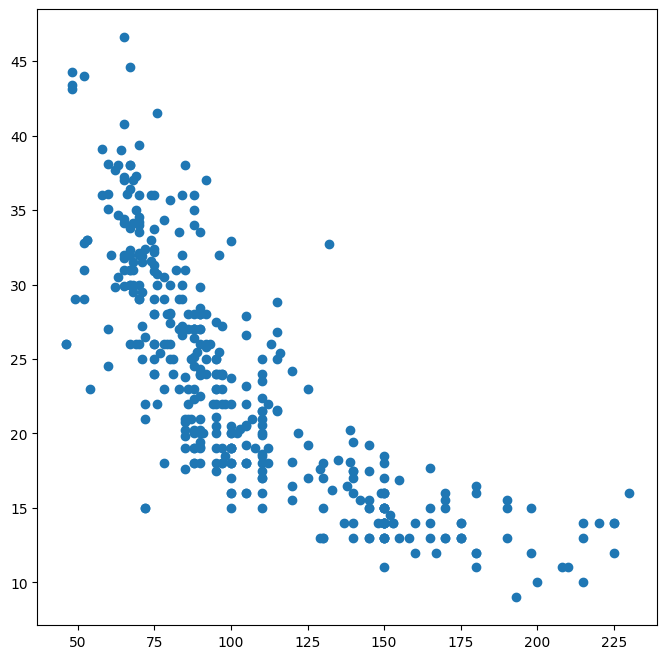

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o');

**CHAPTER 2 QUESTION 10 BOSTON DATA**


10. This exercise involves the Boston housing data set.

b. How many rows are in this data set? How many columns? What do the rows and columns represent?
  1. 506 rows and 13 columns
  2. This data represents housing values in 506 suburbs in Boston. Each row represents a different suburb; each column represents a different predictor variable

c. Make some pairwise scatterplots of the predictors (columns) in this data set. Describe your findings.

  Crime seems to have a relationship with the proportion of residential land owned over 25,000 sq. ft., age of dwelling, mean of weighted distances to employment centers, index of accessibility to radial highways, full-value property-tax rate per 10,000 dollars, pupil-teacher ratio by town, lower status of population, and median value of owner-occupied homes in 1000s(dollars).

d. Are any of the predictors associated with per capita crime rate? If so, explain the relationship.
  1. Industrialization, median values of homes, status of population, and age of dwellings are positively associated with per capita crime rate(CRIM).
  2. Areas with high poverty, low industrialization, older houses, lower median value of homes tend to have higher crime rates.

e. Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.
  1. Yes some suburbs have particularly high crime rates, tax rates, and pupil-teacher ratios.
  2. The range of crime rates is quite wide, with a minimum of approximately 0.0063 and maximum of approximately 88.98. The range of Property Tax Rate is also wide, ranging from minimum 187 to maximum 711. The range of pupil-teacher ratio is closer, ranging from minimum of 12 to maximum of 22.

f. How many of the suburbs in this data set bound the Charles river?

  35 suburbs are bound to the Charles river

g. What is the median pupil-teacher ratio among the towns in this data set?
  
  The median pupil-teacher ratio among the towns in this data set is 19.05

h. Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your fndings.
  1. The suburbs with the lowest median value are represented by the two rows: 398 and 405. Both have a MEDV of 5.0, which is the lowest in the dataset.
  2. Both suburbs have extremely high values compared to the overall range. For property tax, 666 is near the upper end of the overall range. For pupil-teacher ratio, 20.2 is extremely close to the ceiling.

i. In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling
  1. 64 Suburbs have more than seven rooms per dwelling. 13 suburbs have more than eight rooms per dwelling.
  2. Suburbs that average more than 8 rooms per dwelling have extremely low crime rates.



In [ ]:
#import pandas:
import pandas as pd
#import numpy:
import numpy as np
#matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#several others
import scipy
import sklearn
import graphviz

In [ ]:
#textbook package
!pip install ISLP

In [ ]:
import ISLP

In [ ]:
from ISLP import load_data
Boston = load_data('Boston')
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [ ]:
Boston.shape

(506, 13)

In [ ]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [ ]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


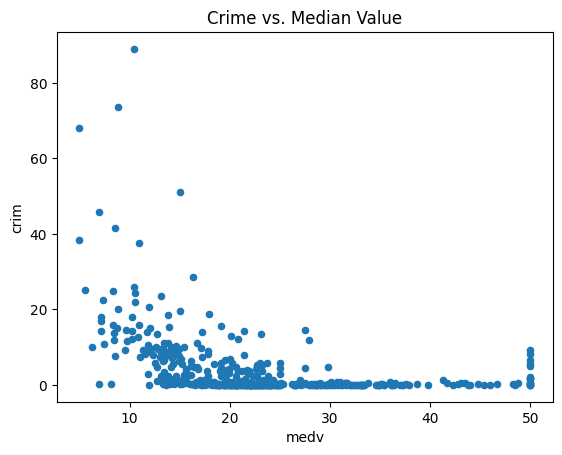

In [ ]:
ax = Boston.plot.scatter('medv', 'crim')
ax.set_title('Crime vs. Median Value');

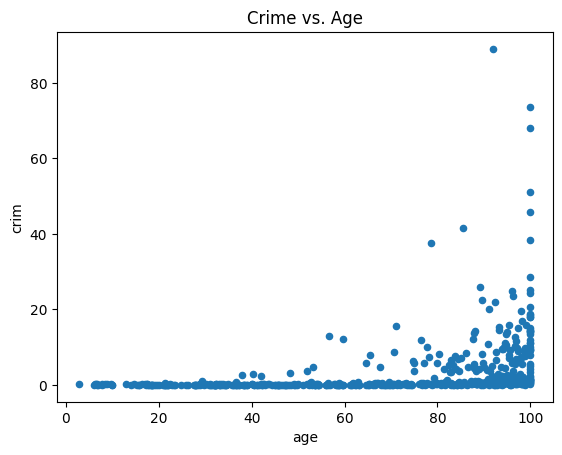

In [ ]:
ax = Boston.plot.scatter('age', 'crim')
ax.set_title('Crime vs. Age');

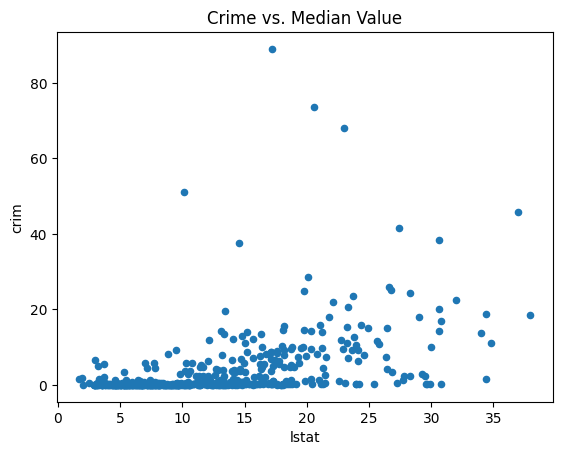

In [ ]:
ax = Boston.plot.scatter('lstat', 'crim')
ax.set_title('Crime vs. Median Value');

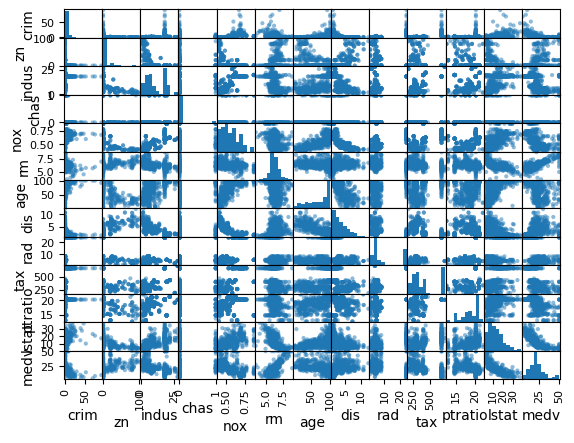

In [ ]:
pd.plotting.scatter_matrix(Boston);

Summary Statistics for Crime Rate (CRIM):
count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

Summary Statistics for Property Tax Rate (TAX):
count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

Summary Statistics for Pupil-Teacher Ratio (PTRATIO):
count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64


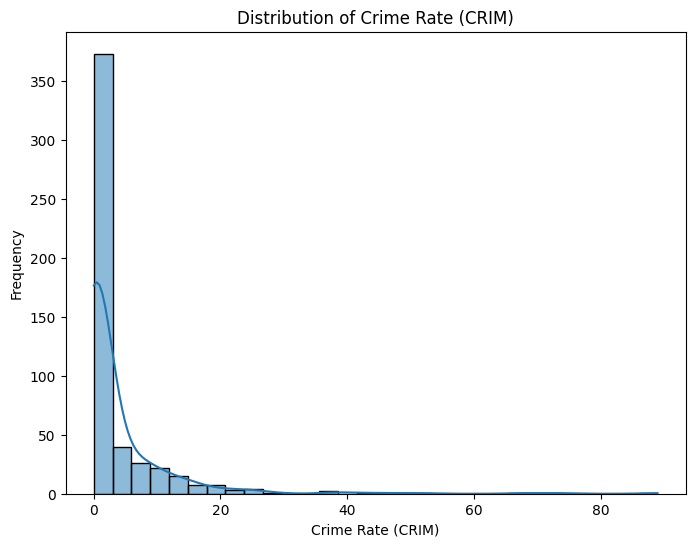

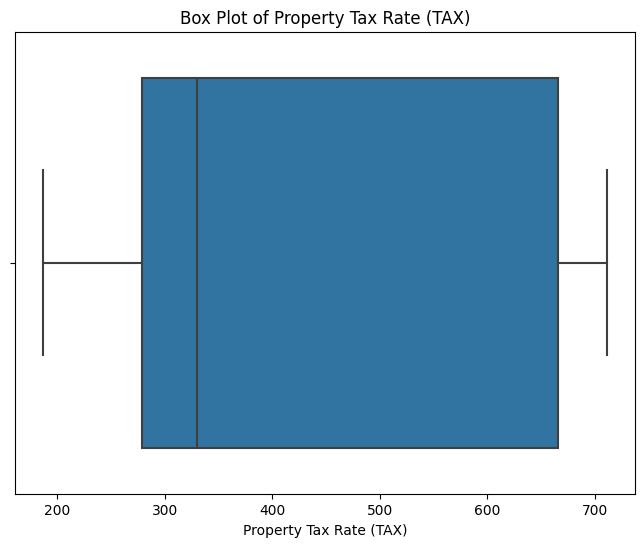

<function seaborn.distributions.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)>

<Figure size 800x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics for crime rate (crim)
print("Summary Statistics for Crime Rate (CRIM):")
print(Boston['crim'].describe())

# Summary statistics for property tax rate (tax)
print("\nSummary Statistics for Property Tax Rate (TAX):")
print(Boston['tax'].describe())

# Summary statistics for pupil-teacher ratio (ptratio)
print("\nSummary Statistics for Pupil-Teacher Ratio (PTRATIO):")
print(Boston['ptratio'].describe())

# Visualizations

# Histogram for crime rate (crim)
plt.figure(figsize=(8, 6))
sns.histplot(data=Boston, x='crim', bins=30, kde=True)
plt.title("Distribution of Crime Rate (CRIM)")
plt.xlabel("Crime Rate (CRIM)")
plt.ylabel("Frequency")
plt.show()

# Box plot for property tax rate (tax)
plt.figure(figsize=(8, 6))
sns.boxplot(data=Boston, x='tax')
plt.title("Box Plot of Property Tax Rate (TAX)")
plt.xlabel("Property Tax Rate (TAX)")
plt.show()

# Histogram for pupil-teacher ratio (ptratio)
plt.figure(figsize=(8, 6))
sns.histplot


In [ ]:
# Count the number of suburbs that bound the Charles River (CHAS=1)
charles_river_bound_suburbs = Boston[Boston['chas'] == 1]
num_charles_river_bound_suburbs = len(charles_river_bound_suburbs)

print("Number of suburbs that bound the Charles River:", num_charles_river_bound_suburbs)


Number of suburbs that bound the Charles River: 35


In [ ]:
# Calculate the median pupil-teacher ratio (PTRATIO)
median_ptratio = Boston['ptratio'].median()

print("Median Pupil-Teacher Ratio (PTRATIO):", median_ptratio)


Median Pupil-Teacher Ratio (PTRATIO): 19.05


In [ ]:
# Find the suburb with the lowest median value of owner-occupied homes (MEDV)
lowest_medv_suburb = Boston[Boston['medv'] == Boston['medv'].min()]

print("Suburb with the Lowest Median Value of Owner-Occupied Homes:")
print(lowest_medv_suburb)

# Calculate the overall ranges for the predictors
crime_rate_range = (Boston['crim'].min(), Boston['crim'].max())
tax_range = (Boston['tax'].min(), Boston['tax'].max())
ptratio_range = (Boston['ptratio'].min(), Boston['ptratio'].max())

print("\nOverall Ranges for Predictors:")
print("Crime Rate (CRIM) Range:", crime_rate_range)
print("Property Tax Rate (TAX) Range:", tax_range)
print("Pupil-Teacher Ratio (PTRATIO) Range:", ptratio_range)


Suburb with the Lowest Median Value of Owner-Occupied Homes:
        crim   zn  indus  chas    nox     rm    age     dis  rad  tax  \
398  38.3518  0.0   18.1     0  0.693  5.453  100.0  1.4896   24  666   
405  67.9208  0.0   18.1     0  0.693  5.683  100.0  1.4254   24  666   

     ptratio  lstat  medv  
398     20.2  30.59   5.0  
405     20.2  22.98   5.0  

Overall Ranges for Predictors:
Crime Rate (CRIM) Range: (0.00632, 88.9762)
Property Tax Rate (TAX) Range: (187, 711)
Pupil-Teacher Ratio (PTRATIO) Range: (12.6, 22.0)


In [ ]:
# Count suburbs with more than seven rooms per dwelling
more_than_seven_rooms = Boston[Boston['rm'] > 7]
num_more_than_seven_rooms = len(more_than_seven_rooms)

# Count suburbs with more than eight rooms per dwelling
more_than_eight_rooms = Boston[Boston['rm'] > 8]
num_more_than_eight_rooms = len(more_than_eight_rooms)

print("Suburbs with More than Seven Rooms per Dwelling:", num_more_than_seven_rooms)
print("Suburbs with More than Eight Rooms per Dwelling:", num_more_than_eight_rooms)


Suburbs with More than Seven Rooms per Dwelling: 64
Suburbs with More than Eight Rooms per Dwelling: 13


**CHAPTER 3 LAB PORTION**


In [ ]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

In [ ]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [ ]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),
                  'lstat': Boston['lstat']})
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [ ]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [ ]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [ ]:
design = MS(['lstat'])
design = design.fit(Boston)
X = design.transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [ ]:
design = MS(['lstat'])
X = design.fit_transform(Boston)
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           5.08e-88
Time:                        08:55:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [ ]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [ ]:
new_predictions = results.get_prediction(newX);
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [ ]:
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [ ]:
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

In [ ]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [ ]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [ ]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [ ]:
minus_age = Boston.columns.drop(['medv', 'age'])
Xma = MS(minus_age).fit_transform(Boston)
model1 = sm.OLS(y, Xma)
summarize(model1.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [ ]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [ ]:
vals = []
for i in range(1, X.values.shape[1]):
    vals.append(VIF(X.values, i))

In [ ]:
X = MS(['lstat',
        'age',
        ('lstat', 'age')]).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [ ]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model3 = sm.OLS(y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [ ]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


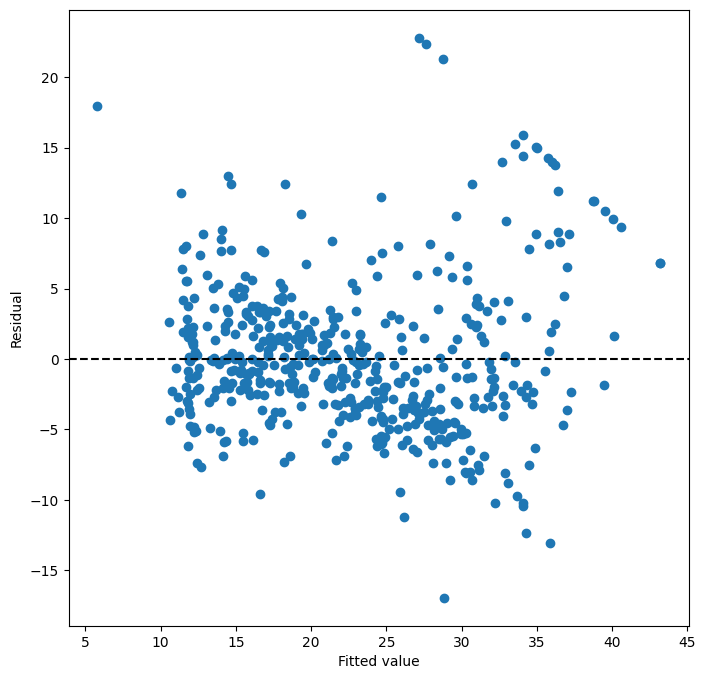

In [ ]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

In [ ]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [ ]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
                   ('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288


**CHAPTER 3 QUESTION 15**

15. This problem involves the Boston data set, which we saw in the lab for this chapter. We will now try to predict per capita crime rate using the other variables in this data set. In other words, per capita crime rate is the response, and the other variables are the predictors.

a. For each predictor, ft a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

  Based on the provided output, the following predictor variables have a statistically significant association with the per capita crime rate (CRIM) at a significance level of 0.05: crim, zn, indus, nox, rm, age, dis, rad, tax, ptratio, lstat.

b. Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 : βj = 0?

  The results of the multiple regression analysis indicate that four predictor variables have coefficients that are statistically different from zero at a significance level of 0.05. These significant predictors are crim, age, dis, and lstat. You can reject their null hypothesis.

c. How do your results from (a) compare to your results from (b)? Create a plot displaying the univariate regression coefcients from (a) on the x-axis, and the multiple regression coefcients from (b) on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefcient in a simple linear regression model is shown on the x-axis, and its coefcient estimate in the multiple linear regression model is shown on the y-axis.

  In the simple regression model, the crim, zn, indus, nox, rm, age, dis, rad, tax, ptratio, and lstat were all statistically significantly. In the multiple linear regression, only crim, age, dis, and lstat are significant.

d. Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, ft a model of the form Y = β0 + β1X + β2X2 + β3X3 + ".

  Based on the output, there is evidence of a non-linear association between the predictor lstat and the response variable crim


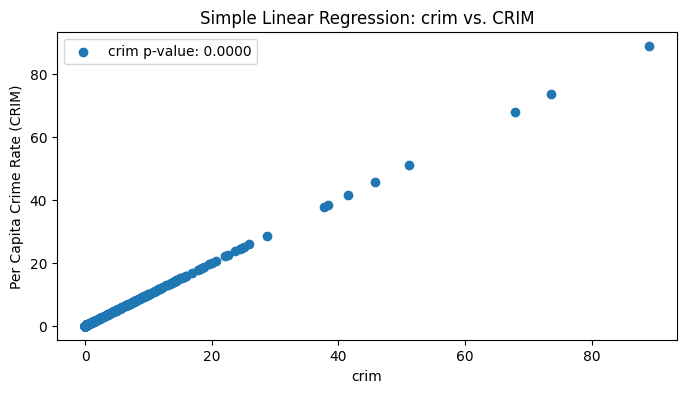

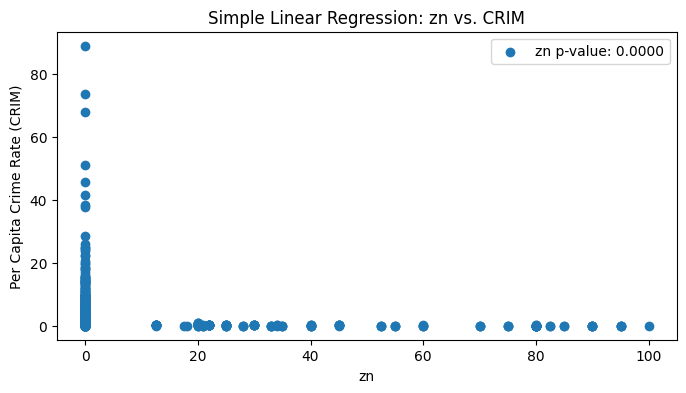

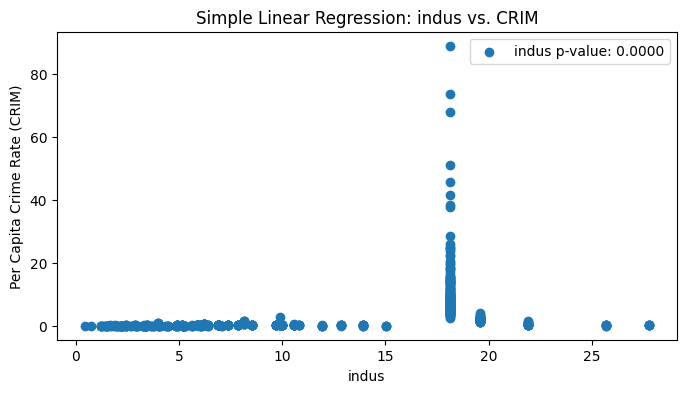

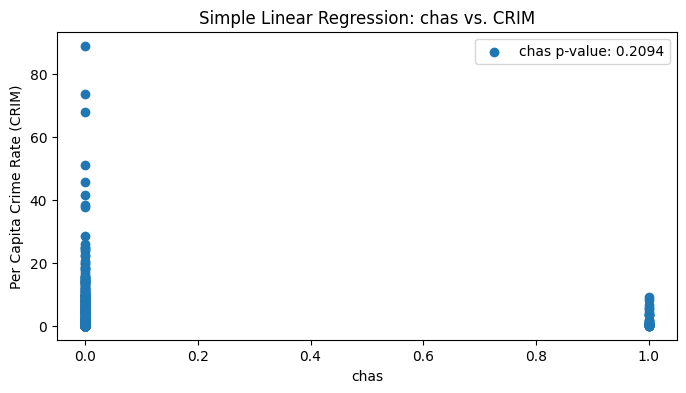

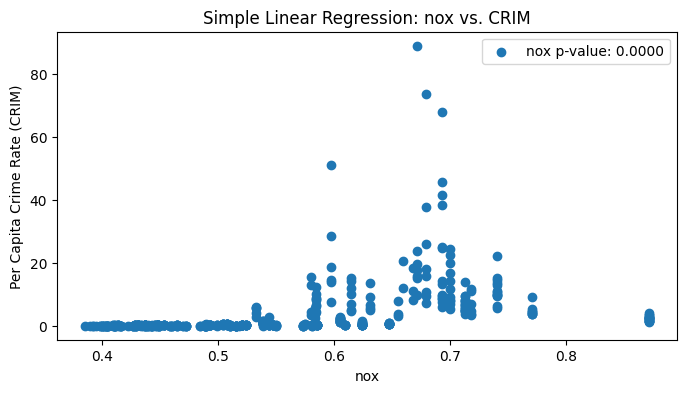

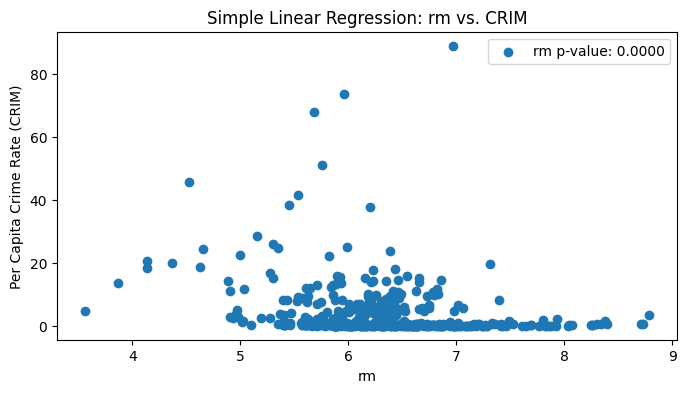

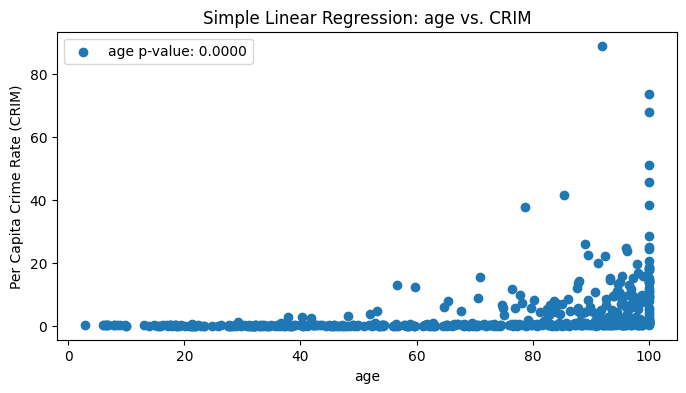

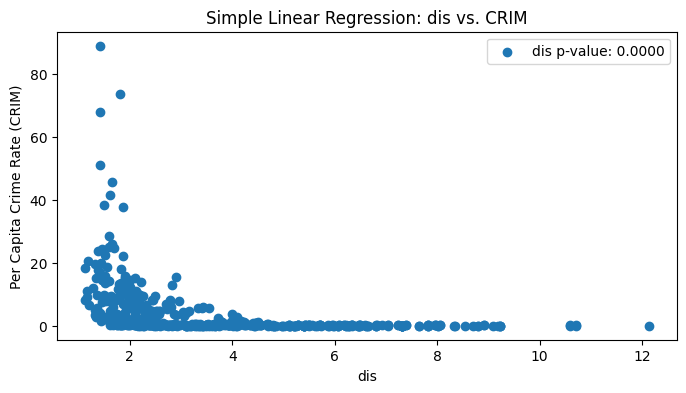

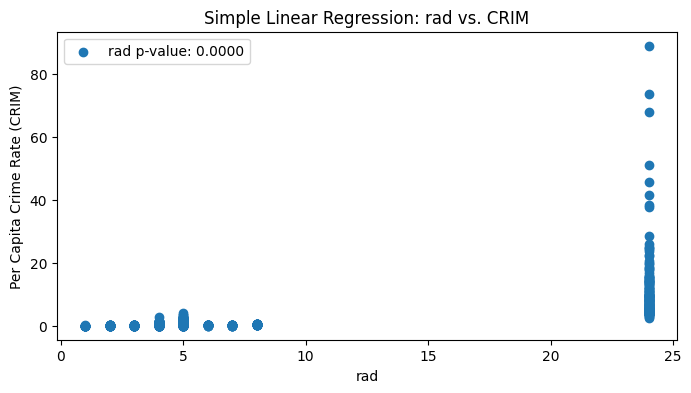

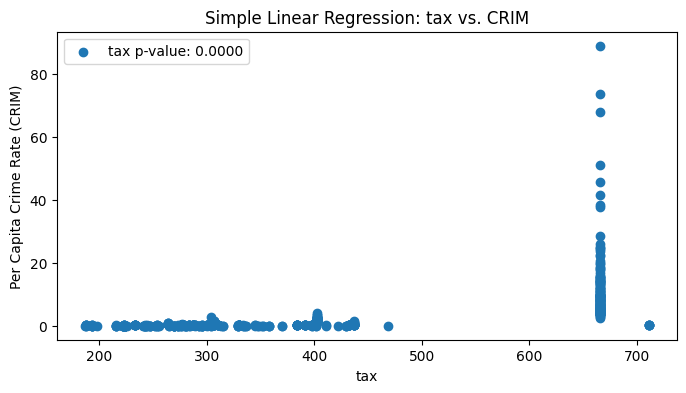

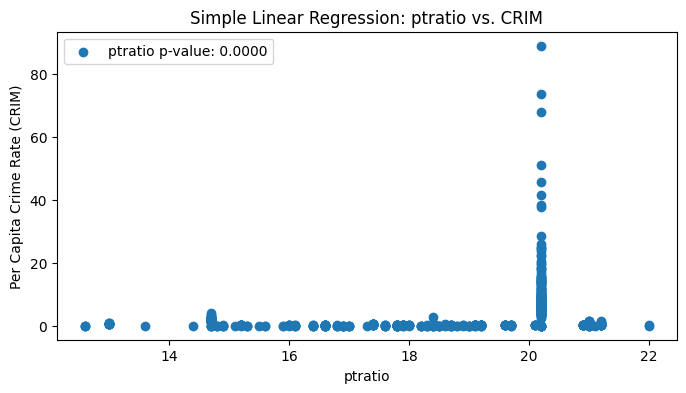

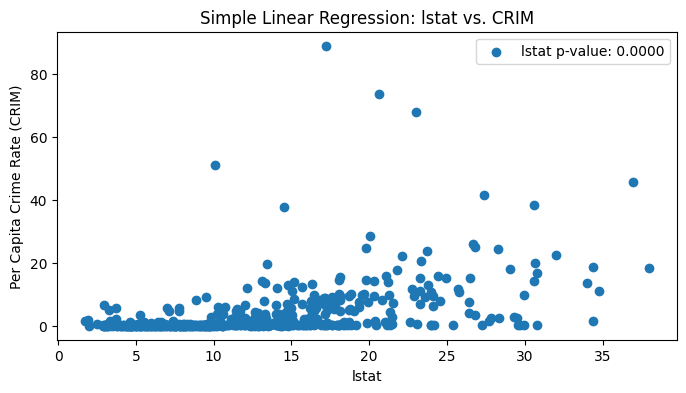

Significant Predictors: ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Create empty lists to store results
significant_predictors = []
p_values = []

# Iterate through predictors
for predictor in Boston.columns[:-1]:  # Exclude the last column (target)
    X = Boston[predictor]
    X = sm.add_constant(X)  # Add a constant term (intercept)
    y = Boston['crim']

    model = sm.OLS(y, X).fit()

    # Check p-value for significance
    p_value = model.pvalues[1]

    if p_value < 0.05:  # Significant at alpha = 0.05
        significant_predictors.append(predictor)

    p_values.append(p_value)

    # Create scatter plot for each predictor
    plt.figure(figsize=(8, 4))
    plt.scatter(X[predictor], y, label=f'{predictor} p-value: {p_value:.4f}')
    plt.xlabel(predictor)
    plt.ylabel("Per Capita Crime Rate (CRIM)")
    plt.title(f"Simple Linear Regression: {predictor} vs. CRIM")
    plt.legend()
    plt.show()

# List significant predictors
print("Significant Predictors:", significant_predictors)


In [ ]:
import statsmodels.api as sm

# Define predictor variables (exclude 'CRIM') and response variable ('CRIM')
X = Boston.drop(columns='crim')
X = sm.add_constant(X)
y = Boston['crim']

# Fit a multiple linear regression model
multi_model = sm.OLS(y, X).fit()

# Check p-values for all predictors
p_values_multi = multi_model.pvalues[1:]

# Determine which predictors have coefficients significantly different from zero
significant_predictors_multi = [predictor for predictor, p_value in zip(Boston.columns[:-1], p_values_multi) if p_value < 0.05]

# List significant predictors
print("Significant Predictors in Multiple Regression:", significant_predictors_multi)


Significant Predictors in Multiple Regression: ['crim', 'age', 'dis', 'lstat']


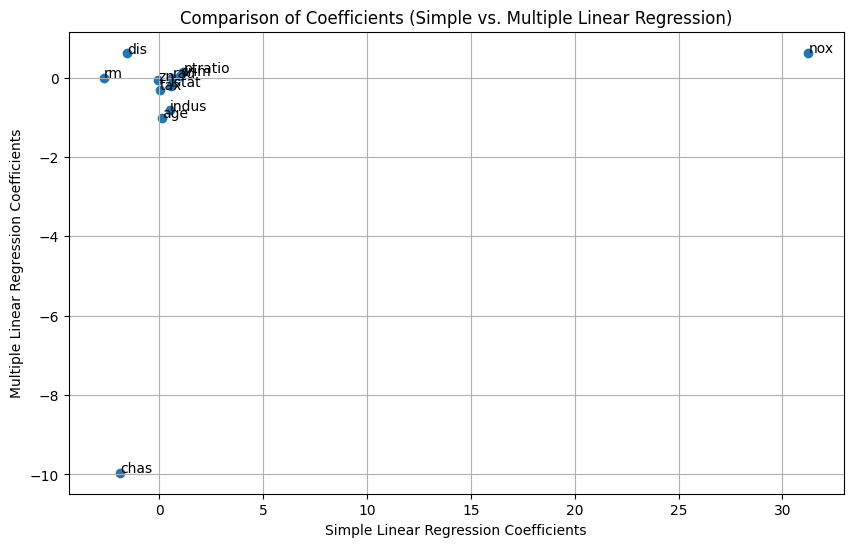

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Fit simple linear regression models for each predictor
simple_model_coefs = []
for predictor in Boston.columns[:-1]:  # Exclude the last column (target)
    X_simple = Boston[predictor]
    X_simple = sm.add_constant(X_simple)
    y_simple = Boston['crim']
    simple_model = sm.OLS(y_simple, X_simple).fit()
    simple_model_coefs.append(simple_model.params[1])  # Coefficient for the predictor

# Fit a multiple linear regression model
multi_model = sm.OLS(y, X).fit()

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(simple_model_coefs, multi_model.params[1:], marker='o')
plt.xlabel("Simple Linear Regression Coefficients")
plt.ylabel("Multiple Linear Regression Coefficients")
plt.title("Comparison of Coefficients (Simple vs. Multiple Linear Regression)")
plt.grid(True)

# Annotate each point with predictor names
for i, predictor in enumerate(Boston.columns[:-1]):
    plt.annotate(predictor, (simple_model_coefs[i], multi_model.params[1:][i]))

plt.show()


In [ ]:
import statsmodels.api as sm

# Define predictor variable and response variable
X = Boston['lstat']  # Example predictor ('lstat' in this case)
X = sm.add_constant(X)  # Add a constant term (β0)
y = Boston['crim']  # Response variable ('crim' in this case)

# Fit a polynomial regression model (here, we fit a cubic polynomial)
poly_model = sm.OLS(y, X).fit()

# Check the summary of the model to assess coefficients and significance
print(poly_model.summary())


                            OLS Regression Results                            
Dep. Variable:                   crim   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     132.0
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           2.65e-27
Time:                        09:57:02   Log-Likelihood:                -1747.5
No. Observations:                 506   AIC:                             3499.
Df Residuals:                     504   BIC:                             3507.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3305      0.694     -4.801      0.0